# Play store apps dataset

In [1]:
import urllib.robotparser
rp = urllib.robotparser.RobotFileParser()
rp.set_url("https://www.etsy.com/robots.txt")
rp.read()
rp.crawl_delay("*")
test_crawl_url="https://play.google.com/store/apps/details?id=com.wildnotion.poetscorner"
can_crawl_listings = rp.can_fetch("*", test_crawl_url)
print("We can crawl Google Play? {0}".format(can_crawl_listings))

We can crawl Google Play? True


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 12]
sns.set_theme(style = "darkgrid",palette="pastel")

In [3]:
df = pd.read_csv("google-play-store-11-2018.csv")
df.head(5)

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
0,com.prettyteengames.royal.princess.wedding.mak...,Royal Princess Wedding Makeover and Dress Up,375.0,1023.0,100000,4.179863,True,True,2017-12-20,3,Casual,GAME_CASUAL,0.0,115,31,98,90,689
1,com.MayGreenStudio.dressup,Momo's Dressup,13492.0,25974.0,1000000,4.711096,False,True,2017-03-07,42,Casual,GAME_CASUAL,0.0,673,213,806,2561,21721
2,air.theflash.f2game.PrettyGirl23,Princess Pretty Girl,1974.0,4610.0,500000,4.295445,False,True,2015-01-18,3,Casual,GAME_CASUAL,0.0,382,206,287,528,3207
3,air.com.dressupone.animeschooluniforms,Anime School Uniforms,2586.0,6081.0,500000,4.209505,False,True,2013-08-20,3,Casual,GAME_CASUAL,0.0,628,193,524,668,4068
4,air.theflash.f2game.PrettyGirl7,Wedding Pretty girl,1409.0,3728.0,500000,4.195011,False,True,2014-09-01,2,Casual,GAME_CASUAL,0.0,358,185,300,414,2471


In [4]:
df.shape

(62694, 18)

In [5]:
df.columns

Index(['app_id', 'title', 'reviews', 'ratings', 'min_installs', 'score',
       'offers_iap', 'ad_supported', 'released', 'ratings_per_day', 'genre',
       'genre_id', 'price', 'rating_one_star', 'rating_two_star',
       'rating_three_star', 'rating_four_star', 'rating_five_star'],
      dtype='object')

In [6]:
df.describe()

,reviews,ratings,min_installs,score,ratings_per_day,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
count,6.268300e+04,6.268300e+04,6.269400e+04,62683.000000,62694.000000,62694.000000,6.269400e+04,6.269400e+04,6.269400e+04,6.269400e+04,6.269400e+04
mean,1.529843e+04,4.936328e+04,2.035663e+06,4.221624,38.620506,0.414998,3.078124e+03,1.211618e+03,3.094328e+03,7.227599e+03,3.474295e+04
std,2.261505e+05,7.690255e+05,2.386872e+07,0.815517,430.422770,3.793236,6.050231e+04,2.193403e+04,5.230251e+04,1.117066e+05,5.368042e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.600000e+01,4.100000e+01,1.000000e+03,4.100497,0.000000,0.000000,2.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.800000e+01
50%,1.440000e+02,3.980000e+02,5.000000e+04,4.403101,0.000000,0.000000,2.400000e+01,9.000000e+00,2.300000e+01,4.700000e+01,2.640000e+02
75%,1.500000e+03,4.488000e+03,5.000000e+05,4.637007,6.000000,0.000000,3.070000e+02,1.090000e+02,2.840000e+02,6.090000e+02,2.933000e+03
max,2.205377e+07,8.128486e+07,1.000000e+09,5.000000,40526.000000,369.990000,9.658715e+06,3.368101e+06,7.164984e+06,1.222342e+07,5.295266e+07


In [7]:
df['genre'].unique()

array(['Casual', 'Tools', 'Medical', 'Food & Drink', 'Lifestyle', 'Card',
       'Entertainment', 'House & Home', 'Productivity', 'Communication',
       'Video Players & Editors', 'Shopping', 'Finance', 'Music & Audio',
       'Personalization', 'Simulation', 'Education', 'Sports',
       'Auto & Vehicles', 'Action', 'Photography', 'News & Magazines',
       'Weather', 'Business', 'Travel & Local', 'Educational',
       'Books & Reference', 'Health & Fitness', 'Racing',
       'Libraries & Demo', 'Role Playing', 'Adventure', 'Arcade',
       'Social', 'Maps & Navigation', 'Board', 'Puzzle', 'Strategy',
       'Art & Design', 'Trivia', 'Parenting', 'Comics', 'Word', 'Casino',
       nan, 'Events', 'Dating', 'Music', 'Beauty'], dtype=object)

In [8]:
g = df.groupby(['genre','min_installs'])
l = df['genre'].unique()
g.first(10)

dict = {}

for group,data in g:
    for i in range(len(l)):
        if group[0] == l[i]:
            if group[0] not in dict:
                dict[group[0]]=group[1]
            else:
                dict[group[0]]+=group[1]

a = sorted(dict.items() ,key = lambda x: x[1])


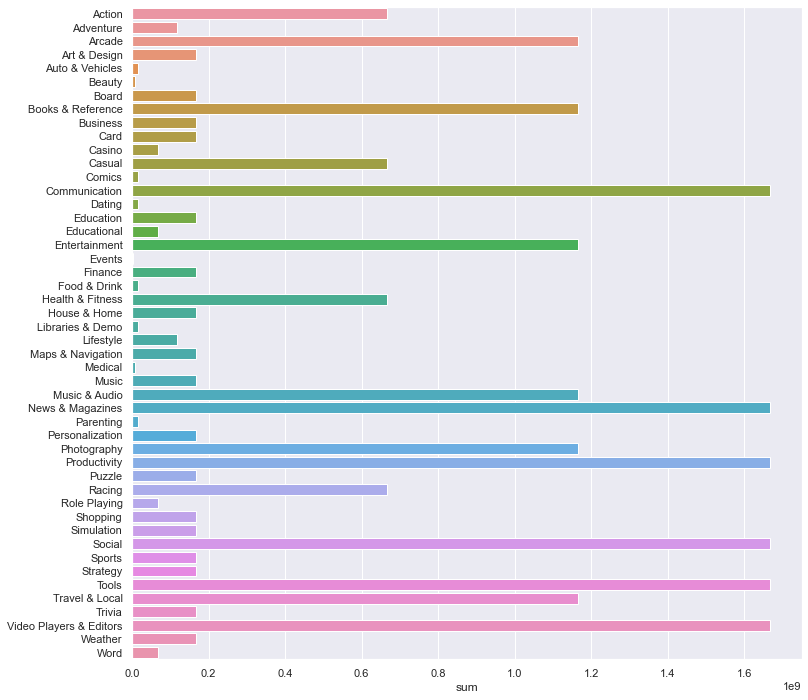

In [9]:
installs = pd.DataFrame.from_dict(dict,orient='index',columns = ['sum'])
installs

sns_sum_plot = sns.barplot(x = 'sum', y = installs.index, data = installs)
#sns_sum_plot.figure.savefig("sum.png")

In [10]:
df.columns

Index(['app_id', 'title', 'reviews', 'ratings', 'min_installs', 'score',
       'offers_iap', 'ad_supported', 'released', 'ratings_per_day', 'genre',
       'genre_id', 'price', 'rating_one_star', 'rating_two_star',
       'rating_three_star', 'rating_four_star', 'rating_five_star'],
      dtype='object')

In [11]:
df['released'] = pd.to_datetime(df['released'])
today = date.today()
d1 = today.strftime("%Y-%m-%d")
today = np.datetime64(d1[:4]+'-'+d1[5:7]+'-'+d1[8:10])

In [12]:
g2 = df.groupby(['genre'])

dict1 = g2.agg({'released': np.min})

d = dict1.to_dict()

min_date = {}
days_since = {}

for values in d.values():
    for k,v in values.items():
        min_date[k] = v

dates = pd.DataFrame.from_dict(min_date,orient='index')

print(dates.head(5))
dates.dtypes

                         0
Action          2010-06-30
Adventure       2011-08-26
Arcade          2010-03-19
Art & Design    2010-07-19
Auto & Vehicles 2010-10-01


0    datetime64[ns]
dtype: object

In [13]:
dates = (today - dates[0]).dt.days

In [14]:
# new_perday = pd.concat(['installs','dates'])
dates.dtypes

dtype('int64')

In [15]:
dat1 = zip(dates.index,dates)

In [16]:
installs_copy = pd.DataFrame.from_dict(dict,orient='index')

In [17]:
value = dates
installs_copy.insert(0,1,value)

In [18]:
installs_copy.head(5)

,1,0
Action,4142,666666600
Adventure,3720,116666610
Arcade,4245,1166666665
Art & Design,4123,166666660
Auto & Vehicles,4049,16666660


In [19]:
installs_copy['per_day'] = installs_copy[0]/installs_copy[1]

installs_copy['days_since_release'] = installs_copy[1]
installs_copy['sum'] = installs_copy[0]
installs_copy.drop(columns = [1,0],inplace = True)

# 1. What categories of applications get a lot of downloads per day?

In [20]:
installs_copy[installs_copy['per_day']==installs_copy['per_day'].max()]

,per_day,days_since_release,sum
Video Players & Editors,399968.00096,4167,1666666660


# 2. What categories of applications don't get many downloads per day?

In [21]:
installs_copy[installs_copy['per_day']==installs_copy['per_day'].min()]

,per_day,days_since_release,sum
Events,464.121415,3591,1666660


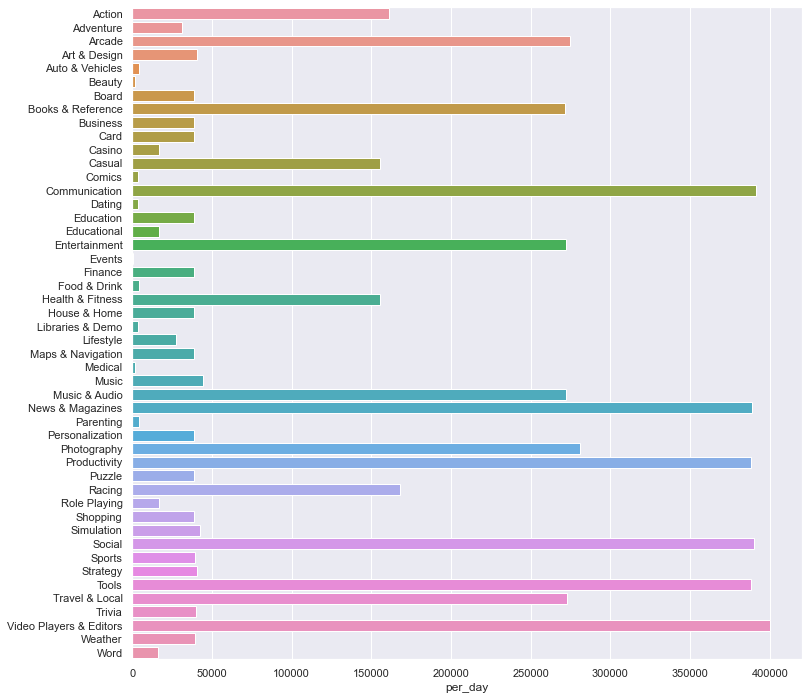

In [22]:
sns_plot = sns.barplot(x = 'per_day', y = installs_copy.index, data = installs_copy)
#sns_plot.figure.savefig("per_day.png")

# 3. In what app categories are there market leaders (one app that clearly is getting downloaded more than the others)?

In [23]:
print(installs_copy[installs_copy['sum']==installs_copy['sum'].max()])
grp1=df.groupby(['title','min_installs'])
dict2={}
for group1,value1 in grp1:
    dict2[group1[0]]=group1[1]

app = sorted(dict2.items(), key=lambda x: x[1])
print(*app[-1])

                        per_day  days_since_release         sum
News & Magazines  388681.591884                4288  1666666666
YouTube 1000000000


### As we have seen earlier "Video Players & Editors" is the market leader in this case. Among those Youtube is at the top with mosst downloaded application.

# 4. How many downloads per day might you expect if you took the time to build an app?

In [24]:
g4 = df.groupby(['genre'])['reviews','ratings','score','min_installs'].max()

In [25]:
g4.describe()

,reviews,ratings,score,min_installs
count,4.800000e+01,4.800000e+01,48.000000,4.800000e+01
mean,3.194407e+06,1.075863e+07,4.996541,3.368958e+08
std,4.995400e+06,1.765074e+07,0.017157,4.061419e+08
min,4.201000e+03,1.590500e+04,4.899322,1.000000e+06
25%,3.677352e+05,1.068225e+06,5.000000,5.000000e+07
50%,1.010888e+06,3.836896e+06,5.000000,1.000000e+08
75%,3.044520e+06,1.099999e+07,5.000000,6.250000e+08
max,2.205377e+07,8.128486e+07,5.000000,1.000000e+09


<AxesSubplot:xlabel='per_day'>

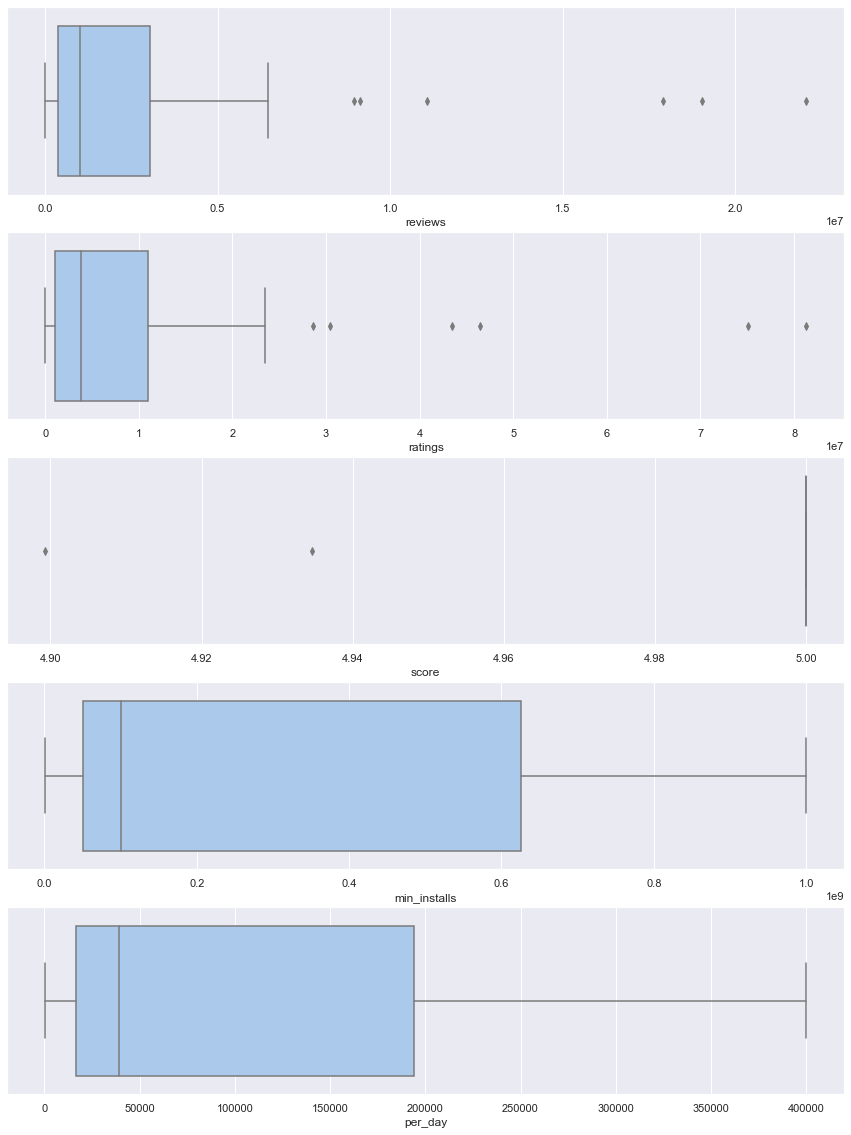

In [26]:
fig, axes = plt.subplots(5,1, figsize=(15, 20), sharey = True)

sns.boxplot(ax=axes[0],x = 'reviews', data=g4)
sns.boxplot(ax=axes[1],x = 'ratings', data=g4)
sns.boxplot(ax=axes[2],x = 'score', data=g4)
sns.boxplot(ax=axes[3],x = 'min_installs', data=g4)
sns.boxplot(ax=axes[4],x = 'per_day', data=installs_copy)

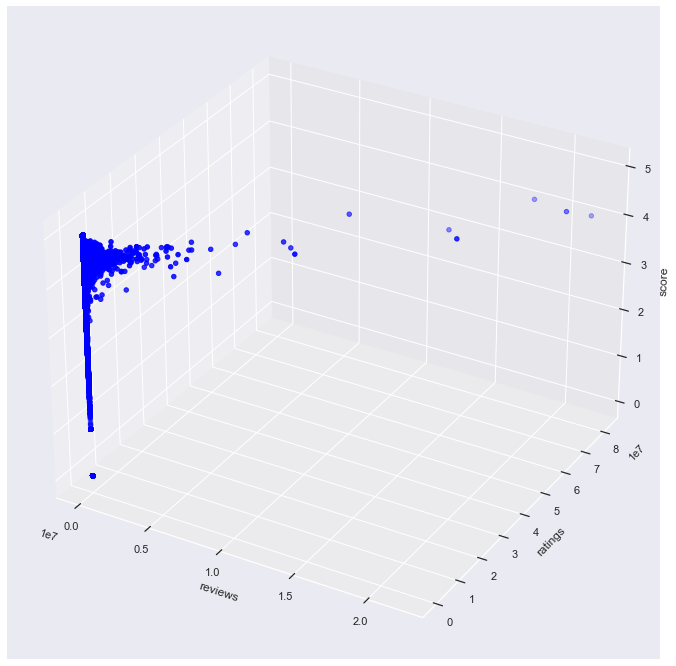

In [27]:
z = np.array(df['score'])
x = np.array(df['reviews'])
y = np.array(df['ratings'])

fig = plt.figure(figsize = (12,12))
ax = plt.axes(projection ="3d")
ax.scatter3D(x,y,z, color='blue')
ax.set_xlabel('reviews')
ax.set_ylabel('ratings')
ax.set_zlabel('score')
plt.show()

<AxesSubplot:xlabel='per_day'>

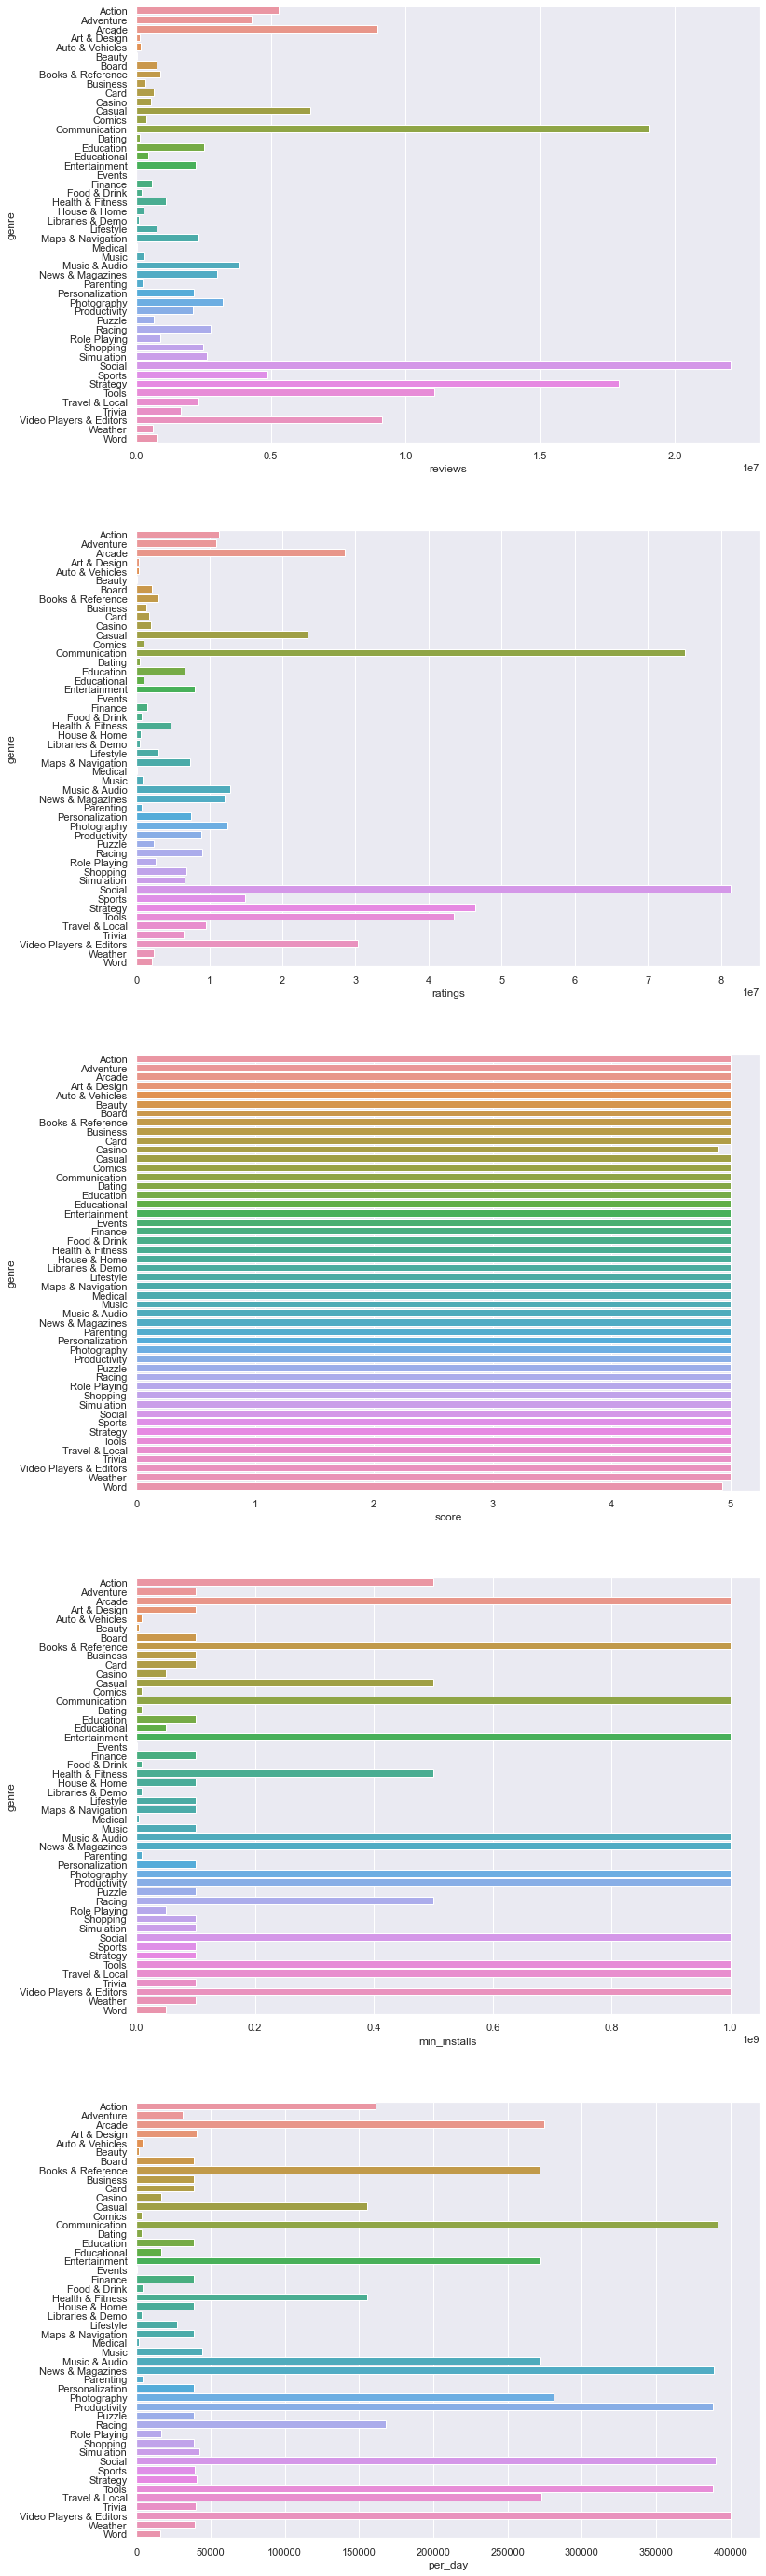

In [28]:
fig, axes = plt.subplots(5,1, figsize=(12, 50), sharey = True)

sns.barplot(ax=axes[0],data = g4,x = 'reviews', y = g4.index)
sns.barplot(ax=axes[1],data = g4,x = 'ratings', y = g4.index)
sns.barplot(ax=axes[2],data = g4,x = 'score', y = g4.index)
sns.barplot(ax=axes[3],data = g4,x = 'min_installs', y = g4.index)
sns.barplot(ax=axes[4],x = 'per_day',y = installs_copy.index , data=installs_copy )

<AxesSubplot:>

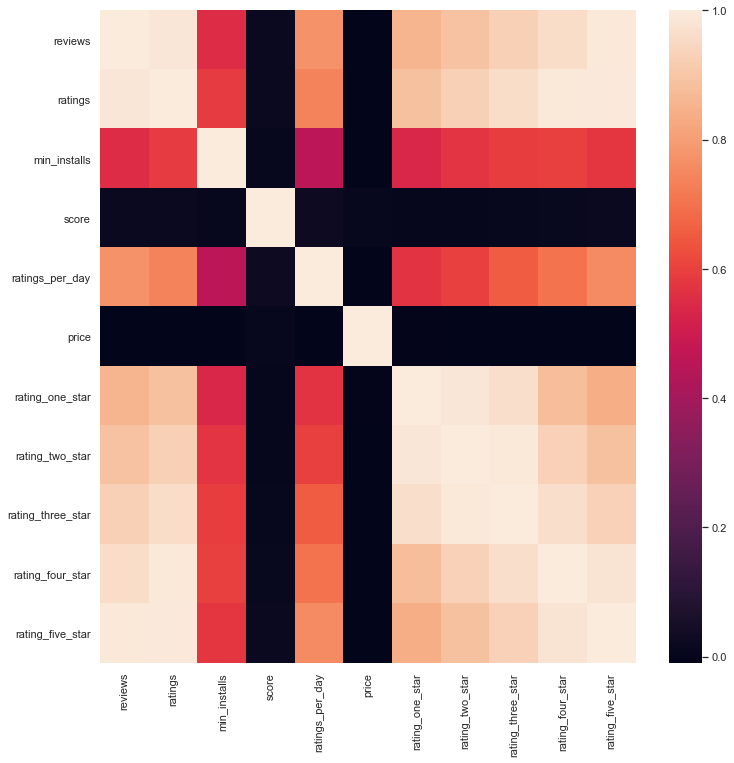

In [29]:
corr_map = df.copy()
corr_map
corr_map.drop(['app_id','title','offers_iap','ad_supported','released','genre','genre_id'],axis = 1,inplace=True)
cor = corr_map.corr()
sns.heatmap(cor)

### From the bar plot and the dataframe above that the best application genres to pursue is social and communication based on reviews, ratings and scores but purely on downloads video players & editors have top downloads.

# 5. What can the data tell you about monetization approaches?

In [30]:
price_df = df[((df["offers_iap"]==True) & (df["ad_supported"]==True)) | (df["price"]>0)]

In [31]:
price_df['revenue'] = price_df['price']*price_df['min_installs']

price_df.head(5)

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star,revenue
0,com.prettyteengames.royal.princess.wedding.mak...,Royal Princess Wedding Makeover and Dress Up,375.0,1023.0,100000,4.179863,True,True,2017-12-20,3,Casual,GAME_CASUAL,0.00,115,31,98,90,689,0.0
9,com.yunbu.balala.magicfairydream.free,Magic Princess Fairy Dream,1108.0,2759.0,100000,4.095687,True,True,2017-12-14,8,Casual,GAME_CASUAL,0.00,316,118,294,289,1742,0.0
19,com.csven.acnlplanner,Planner for AC: NL,9.0,13.0,100,4.538462,False,False,2017-09-17,0,Tools,TOOLS,1.49,1,0,0,2,10,149.0
20,de.ebertp.HomeDroid.Donate,TinyMatic Unlocker,58.0,154.0,10000,4.512987,False,False,2011-01-21,0,House & Home,HOUSE_AND_HOME,8.49,7,4,7,21,115,84900.0
23,com.chimbori.hermitcrab.premium.unlocker,Hermit Premium • Unlocker,35.0,103.0,1000,4.834951,False,False,2017-03-05,0,Productivity,PRODUCTIVITY,5.99,0,1,3,8,91,5990.0


<AxesSubplot:xlabel='revenue', ylabel='genre'>

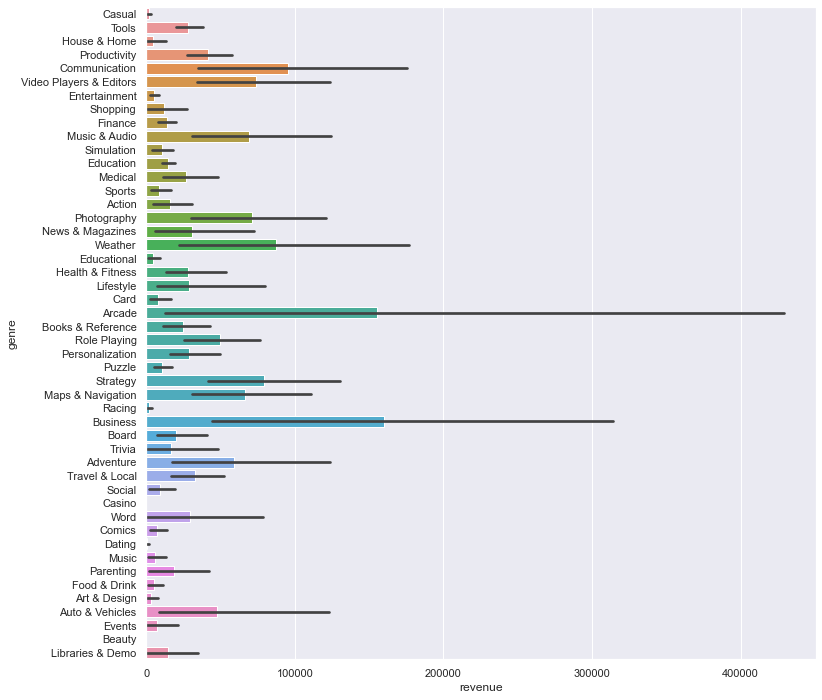

In [32]:
sns.barplot(x = 'revenue', y = 'genre', data = price_df)

In [33]:
price_df[price_df['revenue']==price_df['revenue'].max()]

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star,revenue
33372,com.mojang.minecraftpe,Minecraft,1244042.0,2488345.0,10000000,4.501863,True,False,2011-08-15,942,Arcade,GAME_ARCADE,6.99,153659,55536,113640,231012,1934498,69900000.0


In [34]:
price_df2 = df[(df["offers_iap"]==True) & (df["ad_supported"]==True)]

In [35]:
price_df2[price_df2['min_installs']==price_df2['min_installs'].max()]

,app_id,title,reviews,ratings,min_installs,score,offers_iap,ad_supported,released,ratings_per_day,genre,genre_id,price,rating_one_star,rating_two_star,rating_three_star,rating_four_star,rating_five_star
5298,com.facebook.katana,Facebook,22053770.0,81284862.0,1000000000,4.07372,True,True,NaT,0,Social,SOCIAL,0.0,9658715,3368101,7164984,12223419,48869643
12091,com.kiloo.subwaysurf,Subway Surfers,8939651.0,28564566.0,1000000000,4.49433,True,True,2012-09-20,12774,Arcade,GAME_ARCADE,0.0,1439764,676712,1572821,3509425,21365844


### As per observations and general information the free application with in app purchases and ad-revenue based services are most profitable in both in social and arcade game genre. But purely in upfront revenue generation arcade mobile game genre is best to pursue.